In [ ]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv

import MDAnalysis.analysis.align as aln

In [ ]:
ref1 = mda.Universe()      # define the reference xtal structure
traj1 = mda.Universe("md_0_1_298.gro", "md_0_1_298.xtc")     # define the 

In [ ]:
ref1.trajectory[-1] # last frame
merged = mda.Merge(ref1.atoms, traj1.atoms)
nv.show_mdanalysis(merged)

example

In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms

import pandas as pd
# the next line is necessary to display plots in Jupyter
%matplotlib inline

In [9]:
ref = mda.Universe("csa_solv_ions.gro")     # define the 
u = mda.Universe("md_0_1_298.gro", "md_0_1_298.xtc")     # define the 

In [10]:
ref.trajectory[-1] # last frame

< Timestep 0 with unit cell dimensions [41.003 41.003 41.003 90.    90.    90.   ] >

In [13]:
rms.rmsd(u.select_atoms('backbone').positions,  # coordinates to align
         ref.select_atoms('backbone').positions,  # reference coordinates
         center=True,  # subtract the center of geometry
         superposition=True)  # superimpose coordinates

AttributeError: 'float' object has no attribute 'run'

In [15]:
R = rms.RMSD(u,  # universe to align
             ref,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             #groupselections=[CORE, LID, NMP],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R.run()
R.rmsd.shape

(5001, 3)

In [16]:
df = pd.DataFrame(R.rmsd,
                  columns=['Frame', 'Time (ns)',
                           'Backbone'])

df

,Frame,Time (ns),Backbone
0,0.0,0.0,0.247349
1,1.0,10.0,0.533962
2,2.0,20.0,0.313419
3,3.0,30.0,0.209086
4,4.0,40.0,0.518038
...,...,...,...
4996,4996.0,49960.0,0.345041
4997,4997.0,49970.0,0.552461
4998,4998.0,49980.0,0.516109
4999,4999.0,49990.0,0.515401


Text(0, 0.5, 'RMSD ($\\AA$)')

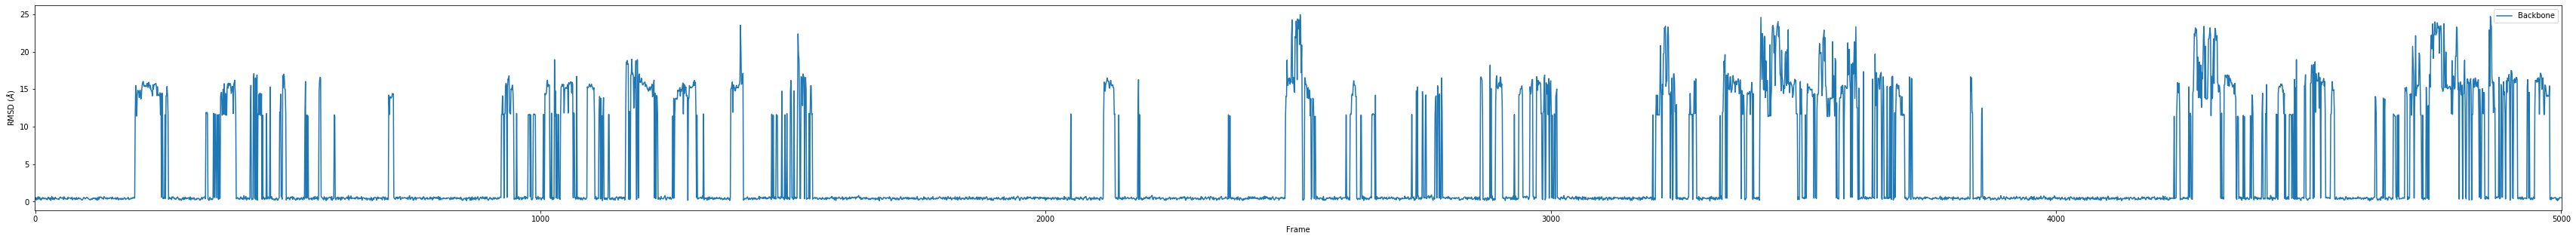

In [23]:
ax = df.plot(x='Frame', y=['Backbone'],
             kind='line', figsize=(60,5), xlim=(-1,5001))
ax.set_ylabel(r'RMSD ($\AA$)')

In [ ]:
# Improve by: plotting RMSD relative to multiple structures on the same (x) axis?
    # need to extract the protein from the system (gmx trjconv ... -o ... .gro) to allow comparison b/w each of the models wanted for comparison, then run all three on the same x-axis!
    # plot RMSD and eigenvalues calculated on same x axis to see a correlation?
    # 